In [64]:
from statsmodels.tsa.vector_ar.var_model import VAR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller


CURR_DIR_PATH = os.getcwd()
FILE_PATH = CURR_DIR_PATH + '/data/'

emission_df = pd.read_csv(f'{FILE_PATH}transformed_finland_data/finland_cities_emissions.csv')
emission_df = emission_df[emission_df['Year'] > 2010]
emission_df['Year'] = pd.to_datetime(emission_df['Year'], format='%Y')
emission_df = emission_df.drop('Region', axis=1)
emission_df_dupes = emission_df[emission_df.duplicated(keep=False) == True]
emission_df_dupes

,Year,City,Population,Waste And Sewage,Machinery,Electricity And District Heating,Other Heating,Agriculture,Transportation,Industry,Total Emissions
80,2015-01-01,Seinaejoki,61530.0,26.8,26.2,175.0,60.8,97.0,125.1,13.2,538.2
81,2016-01-01,Seinaejoki,62052.0,25.1,26.8,197.7,64.4,101.1,137.6,8.2,574.8
82,2017-01-01,Seinaejoki,62676.0,23.8,28.7,182.0,60.5,100.5,126.5,8.6,543.4
83,2018-01-01,Seinaejoki,63288.0,23.0,28.9,196.7,60.4,100.6,129.3,7.3,558.6
84,2019-01-01,Seinaejoki,63781.0,22.4,36.1,188.7,56.2,102.2,124.3,6.5,548.2
85,2020-01-01,Seinaejoki,64130.0,21.5,25.8,169.3,46.0,102.3,116.5,6.2,498.7
86,2021-01-01,Seinaejoki,64736.0,20.3,25.4,156.4,51.3,99.6,111.8,4.7,479.7
87,2022-01-01,Seinaejoki,65323.0,19.2,23.7,110.2,44.6,99.0,108.7,7.5,422.3
157,2015-01-01,Seinaejoki,61530.0,26.8,26.2,175.0,60.8,97.0,125.1,13.2,538.2
158,2016-01-01,Seinaejoki,62052.0,25.1,26.8,197.7,64.4,101.1,137.6,8.2,574.8


In [65]:
emission_df = emission_df.drop_duplicates()

In [66]:
# pivot df to have regions as columns and years as index
emission_pivot = emission_df.pivot(index='Year', columns='City', values='Total Emissions')
emission_pivot

City,Haemeenlinna,Helsinki,Joensuu,Jyvaeskylae,Kajaani,Kokkola,Kouvola,Kuopio,Lahti,Lappeenranta,Mariehamn,Mikkeli,Oulu,Pori,Rovaniemi,Seinaejoki,Tampere,Turku
Year,,,,,,,,,,,,,,,,,,
2015-01-01,405.7,2524.2,405.5,689.2,202.6,405.0,574.6,724.6,639.8,430.5,62.5,325.4,1040.4,480.3,402.4,538.2,956.1,910.5
2016-01-01,428.2,2932.8,433.9,716.7,222.6,425.6,605.5,745.9,671.2,450.9,69.0,345.6,1074.8,515.1,412.1,574.8,1015.1,980.1
2017-01-01,406.7,2820.8,404.9,661.8,213.9,396.8,570.3,675.1,633.8,409.6,66.1,322.9,1019.3,478.7,397.1,543.4,940.1,919.4
2018-01-01,410.9,2811.8,403.9,709.1,209.5,401.2,572.7,717.3,667.4,441.1,64.8,328.8,1050.3,492.4,403.4,558.6,963.7,877.1
2019-01-01,391.4,2660.0,372.5,661.6,220.2,391.2,536.1,662.7,550.3,400.9,64.2,306.0,1036.6,455.5,388.9,548.2,912.2,728.2
2020-01-01,347.8,2319.0,336.6,588.6,190.9,360.2,497.7,627.6,428.5,363.9,44.3,281.1,929.5,388.9,349.9,498.7,838.1,571.3
2021-01-01,328.3,2435.4,338.7,569.0,186.2,354.3,506.7,614.9,421.9,359.0,45.7,291.7,838.1,370.1,313.0,479.7,863.3,617.2
2022-01-01,320.3,2569.7,309.7,517.0,214.7,333.3,490.3,586.5,401.4,346.7,40.0,269.7,755.7,341.9,311.7,422.3,831.0,582.4


In [67]:
emission_pivot_log = np.log(emission_pivot) # np.log to reduce range of data and stabilize variance
emission_pivot_log

City,Haemeenlinna,Helsinki,Joensuu,Jyvaeskylae,Kajaani,Kokkola,Kouvola,Kuopio,Lahti,Lappeenranta,Mariehamn,Mikkeli,Oulu,Pori,Rovaniemi,Seinaejoki,Tampere,Turku
Year,,,,,,,,,,,,,,,,,,
2015-01-01,6.005614,7.833679,6.005121,6.535532,5.311234,6.003887,6.353674,6.585620,6.461156,6.064947,4.135167,5.785055,6.947361,6.174411,5.997447,6.288230,6.862863,6.813994
2016-01-01,6.059590,7.983713,6.072814,6.574657,5.405376,6.053500,6.406055,6.614592,6.509067,6.111246,4.234107,5.845282,6.979890,6.244361,6.021266,6.354022,6.922742,6.887655
2017-01-01,6.008076,7.944776,6.003640,6.494963,5.365509,5.983432,6.346163,6.514861,6.451733,6.015181,4.191169,5.777343,6.926871,6.171074,5.984188,6.297846,6.845986,6.823721
2018-01-01,6.018350,7.941580,6.001167,6.563997,5.344724,5.994460,6.350362,6.575494,6.503390,6.089272,4.171306,5.795450,6.956831,6.199291,5.999929,6.325434,6.870780,6.776621
2019-01-01,5.969730,7.886081,5.920237,6.494661,5.394536,5.969219,6.284321,6.496322,6.310464,5.993712,4.162003,5.723585,6.943701,6.121396,5.963322,6.306640,6.815859,6.590576
2020-01-01,5.851628,7.748891,5.818895,6.377747,5.251750,5.886659,6.209997,6.441903,6.060291,5.896879,3.790985,5.638710,6.834647,5.963322,5.857647,6.212005,6.731137,6.347914
2021-01-01,5.793928,7.797866,5.825115,6.343880,5.226821,5.870144,6.227919,6.421460,6.044768,5.883322,3.822098,5.675726,6.731137,5.913773,5.746203,6.173161,6.760762,6.425193
2022-01-01,5.769258,7.851544,5.735604,6.248043,5.369242,5.809043,6.195017,6.374173,5.994958,5.848460,3.688879,5.597310,6.627644,5.834518,5.742041,6.045716,6.722630,6.367157


In [68]:
# do .diff() to make data stationary (e.g. mean doesnt't change along time series). 
emission_pivot_diff = emission_pivot_log.diff().dropna() # calcs difference between each element and the previous, need dropna because a NaN is introduced as first entry has no prev entry
emission_pivot_diff

City,Haemeenlinna,Helsinki,Joensuu,Jyvaeskylae,Kajaani,Kokkola,Kouvola,Kuopio,Lahti,Lappeenranta,Mariehamn,Mikkeli,Oulu,Pori,Rovaniemi,Seinaejoki,Tampere,Turku
Year,,,,,,,,,,,,,,,,,,
2016-01-01,0.053976,0.150033,0.067693,0.039126,0.094143,0.049613,0.052380,0.028972,0.047912,0.046298,0.098940,0.060227,0.032529,0.069950,0.023819,0.065792,0.059880,0.073661
2017-01-01,-0.051515,-0.038937,-0.069174,-0.079694,-0.039868,-0.070068,-0.059892,-0.099731,-0.057334,-0.096065,-0.042938,-0.067939,-0.053018,-0.073287,-0.037078,-0.056176,-0.076756,-0.063933
2018-01-01,0.010274,-0.003196,-0.002473,0.069033,-0.020785,0.011028,0.004199,0.060633,0.051656,0.074091,-0.019863,0.018107,0.029960,0.028217,0.015740,0.027588,0.024794,-0.047100
2019-01-01,-0.048620,-0.055499,-0.080930,-0.069335,0.049812,-0.025241,-0.066041,-0.079172,-0.192926,-0.095560,-0.009302,-0.071865,-0.013130,-0.077896,-0.036606,-0.018793,-0.054921,-0.186045
2020-01-01,-0.118102,-0.137190,-0.101342,-0.116914,-0.142786,-0.082560,-0.074323,-0.054419,-0.250173,-0.096833,-0.371019,-0.084875,-0.109055,-0.158073,-0.105675,-0.094635,-0.084722,-0.242661
2021-01-01,-0.057700,0.048975,0.006219,-0.033866,-0.024928,-0.016515,0.017922,-0.020443,-0.015522,-0.013557,0.031114,0.037015,-0.103509,-0.049549,-0.111444,-0.038844,0.029625,0.077279
2022-01-01,-0.024670,0.053678,-0.089511,-0.095838,0.142420,-0.061101,-0.032902,-0.047287,-0.049810,-0.034863,-0.133219,-0.078416,-0.103493,-0.079255,-0.004162,-0.127445,-0.038132,-0.058036


In [69]:
model = VAR(emission_pivot_diff)
model_fit = model.fit()

forecast_steps = 3 # steps = number of years to forecast
lag_order = model_fit.k_ar # retrieve optimal lag_order (= amount of previous steps used in model) from model_fit

forecast_input = emission_pivot_diff.values[-lag_order:] # conv to np array, slice last lag_order to use when forecasting. If lag_order = 3, returns array with 3 nested arrays with 19 entries(each region)
forecast_diff = model_fit.forecast(y=forecast_input, steps=forecast_steps) # returns array with nested array of forecasted data for each step, predictions also in diffferences 
forecast_diff


c:\repos\graduationa_project_carbon_calculator\graduation_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


array([[-0.01109565,  0.01945991,  0.02063537,  0.04323483, -0.0956516 ,
        -0.01687909,  0.01344193,  0.01379029,  0.12477881,  0.03926632,
         0.04416258,  0.03872542, -0.01823534,  0.0195629 , -0.02944934,
         0.00962588,  0.01579256,  0.08556918],
       [ 0.03483712,  0.04054472, -0.04607788,  0.02270528,  0.17165446,
         0.01536991, -0.02207645,  0.00145685, -0.00992976,  0.02071955,
         0.10243795, -0.03567696,  0.0460494 ,  0.01987971,  0.05956081,
         0.00953654,  0.00294099, -0.09133424],
       [-0.09865602, -0.17044862, -0.10662844, -0.09364667, -0.13976333,
        -0.07069759, -0.09746098, -0.07778908, -0.25690372, -0.11904088,
        -0.26799146, -0.10062082, -0.03727729, -0.13116974, -0.06843674,
        -0.04291224, -0.10604834, -0.29000891]])

In [70]:
# create range of future years, length matching steps
forecast_index = pd.date_range(
    # start at last known data point, starts forecast at start + 1 year and predicts three years
    start=emission_pivot.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='YS') # YS = year start, start of year as frequency (yyyy-01-01)

# create a forecast df (three rows, matching steps): use prev range as index, forecast_diff as values and get column names from emission_pivot (need to be identical for later)
forecast_diff_df = pd.DataFrame(
    forecast_diff, index=forecast_index, columns=emission_pivot.columns)
forecast_diff_df 

City,Haemeenlinna,Helsinki,Joensuu,Jyvaeskylae,Kajaani,Kokkola,Kouvola,Kuopio,Lahti,Lappeenranta,Mariehamn,Mikkeli,Oulu,Pori,Rovaniemi,Seinaejoki,Tampere,Turku
2023-01-01,-0.011096,0.019460,0.020635,0.043235,-0.095652,-0.016879,0.013442,0.013790,0.124779,0.039266,0.044163,0.038725,-0.018235,0.019563,-0.029449,0.009626,0.015793,0.085569
2024-01-01,0.034837,0.040545,-0.046078,0.022705,0.171654,0.015370,-0.022076,0.001457,-0.009930,0.020720,0.102438,-0.035677,0.046049,0.019880,0.059561,0.009537,0.002941,-0.091334
2025-01-01,-0.098656,-0.170449,-0.106628,-0.093647,-0.139763,-0.070698,-0.097461,-0.077789,-0.256904,-0.119041,-0.267991,-0.100621,-0.037277,-0.131170,-0.068437,-0.042912,-0.106048,-0.290009


In [71]:
# conv forecast back to original scale 
last_log_values = emission_pivot_log.iloc[-1]
forecast_log_original = last_log_values + forecast_diff_df.cumsum() # cumulative sum of forecast diff values, basically undo the diff
forecast_original = np.exp(forecast_log_original) # "undo" the log operation

# append forecast data (now in original scale) to historical data
combined_series = pd.concat([emission_pivot, forecast_original])
print(combined_series)



City        Haemeenlinna     Helsinki     Joensuu  Jyvaeskylae     Kajaani  \
2015-01-01    405.700000  2524.200000  405.500000   689.200000  202.600000   
2016-01-01    428.200000  2932.800000  433.900000   716.700000  222.600000   
2017-01-01    406.700000  2820.800000  404.900000   661.800000  213.900000   
2018-01-01    410.900000  2811.800000  403.900000   709.100000  209.500000   
2019-01-01    391.400000  2660.000000  372.500000   661.600000  220.200000   
2020-01-01    347.800000  2319.000000  336.600000   588.600000  190.900000   
2021-01-01    328.300000  2435.400000  338.700000   569.000000  186.200000   
2022-01-01    320.300000  2569.700000  309.700000   517.000000  214.700000   
2023-01-01    316.765708  2620.195872  316.157170   539.842649  195.115191   
2024-01-01    327.995382  2728.614020  301.919849   552.240139  231.653928   
2025-01-01    297.181631  2301.003146  271.383552   502.872329  201.437918   

City           Kokkola     Kouvola      Kuopio       Lahti  Lap

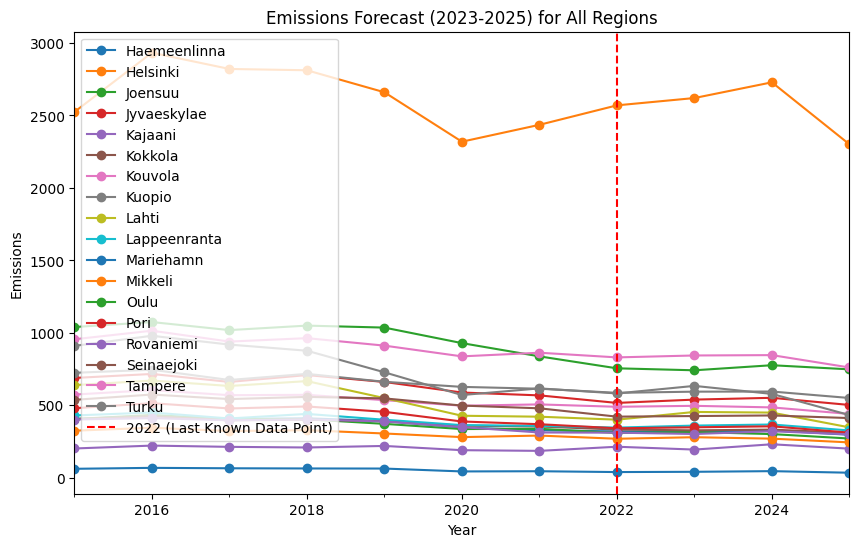

In [72]:
combined_series.plot(figsize=(10, 6), marker='o')
plt.axvline(x=emission_pivot.index[-1], color='red',
            linestyle='--', label='2022 (Last Known Data Point)') #vertical line to mark split between historical/forecast data
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title('Emissions Forecast (2023-2025) for All Regions')
plt.legend()
plt.show()